Importing Libraries

In [381]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Reading The data

In [382]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


no duplicates in id

In [383]:
data['id'].duplicated().sum()

0

make id column as index

In [384]:
data.set_index('id', inplace= True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Info

In [385]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [386]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


Shape

In [387]:
data.shape

(5110, 11)

Duplicates (Not Found)

In [388]:
data.duplicated().sum()

0

Checking Nulls

In [389]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

4% of bmi column is nulls, will be replaced by mean

In [390]:
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Visualization

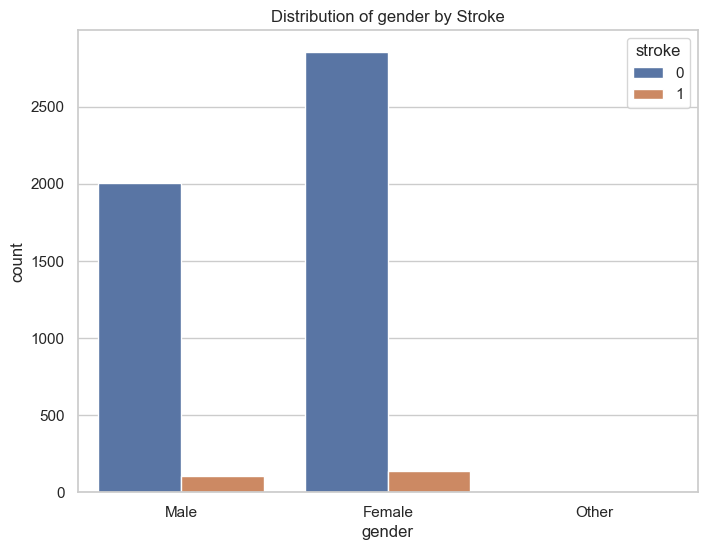

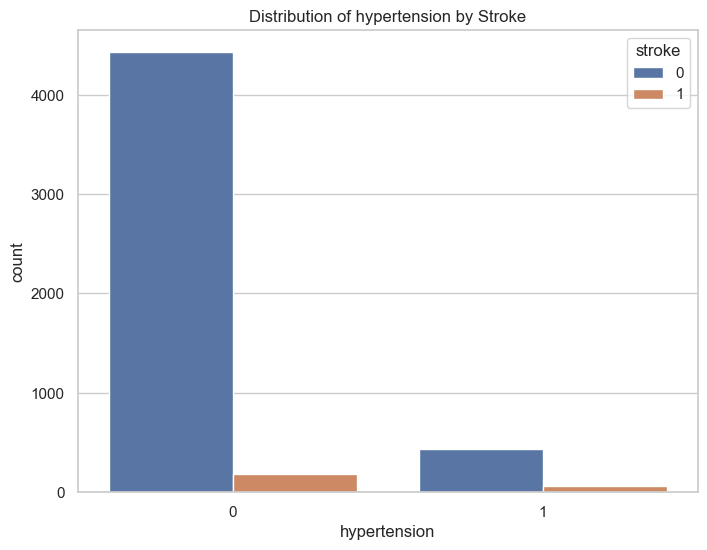

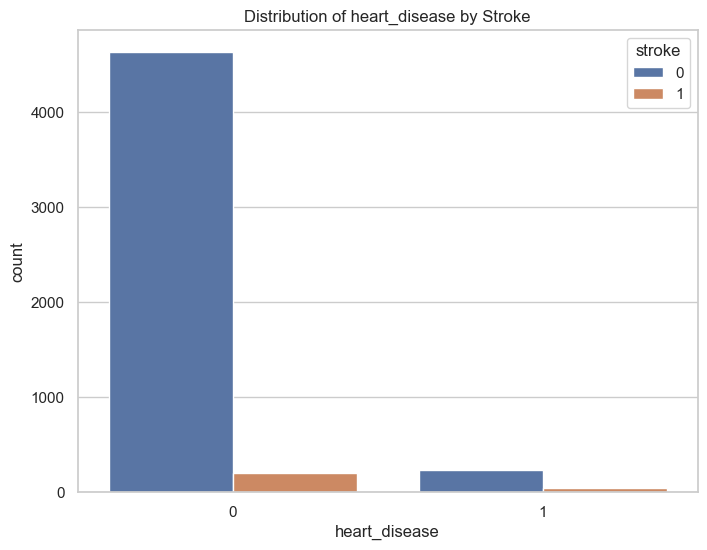

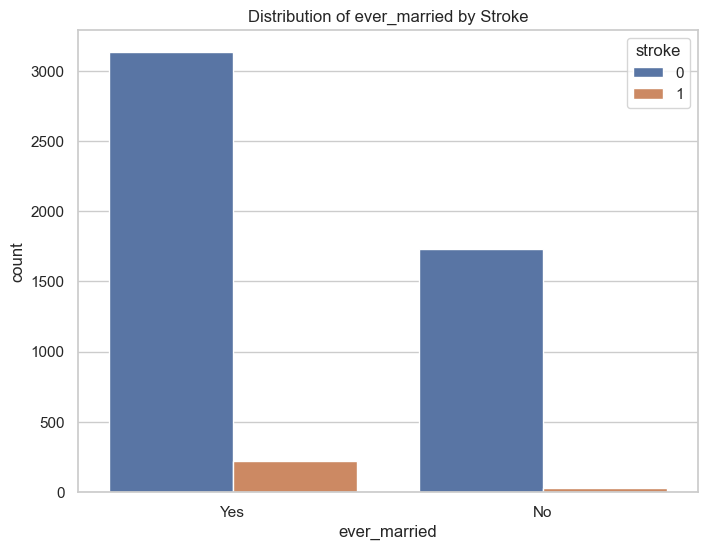

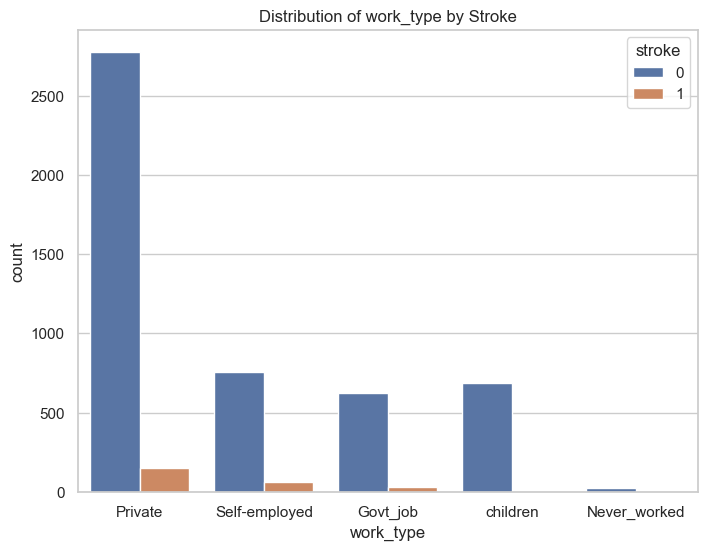

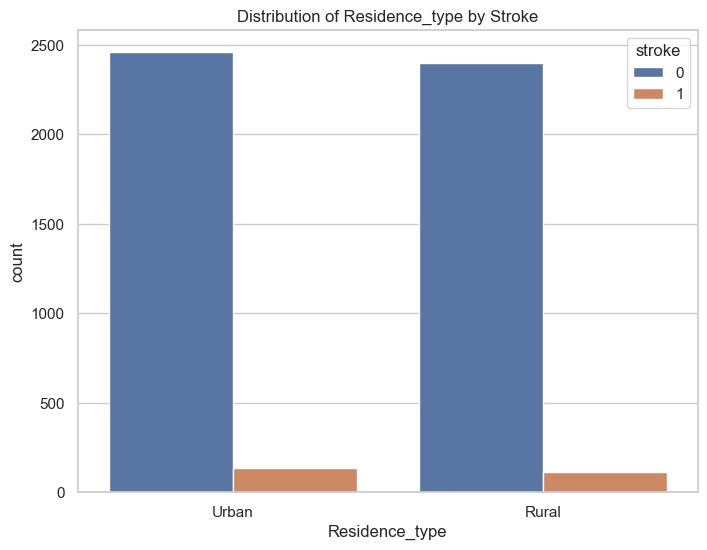

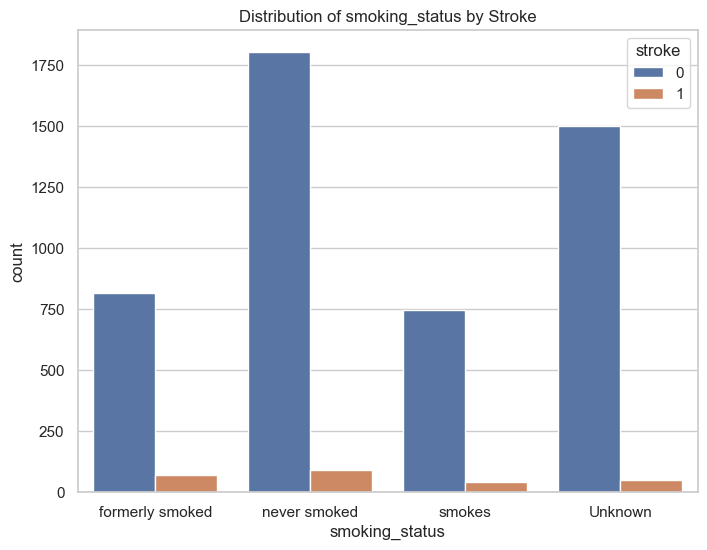

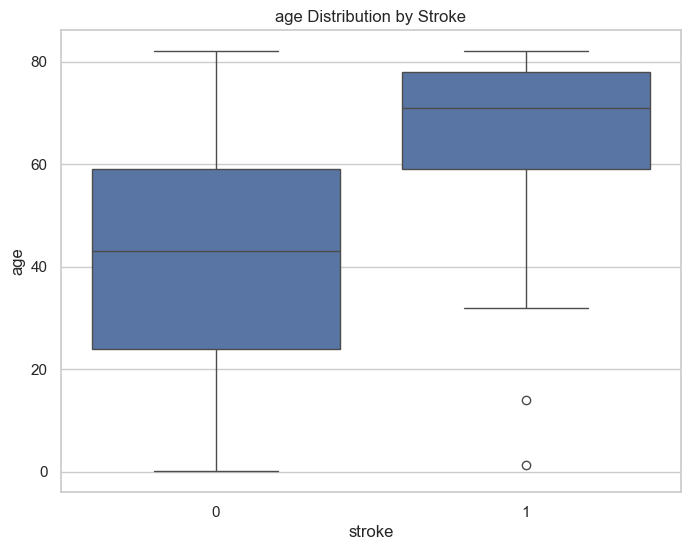

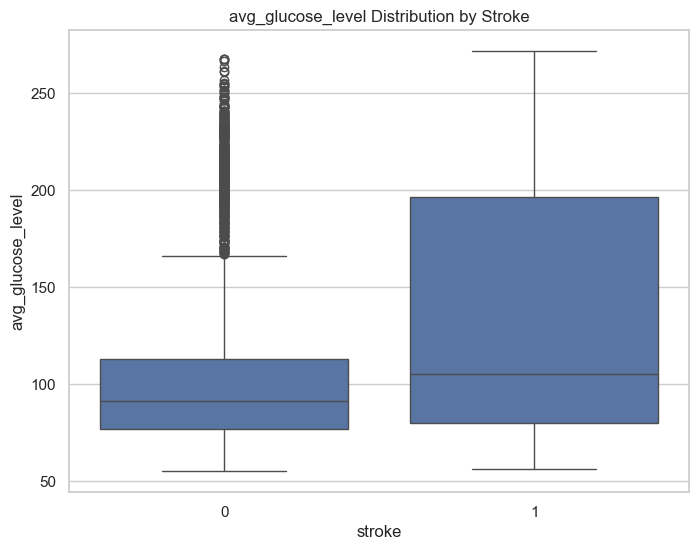

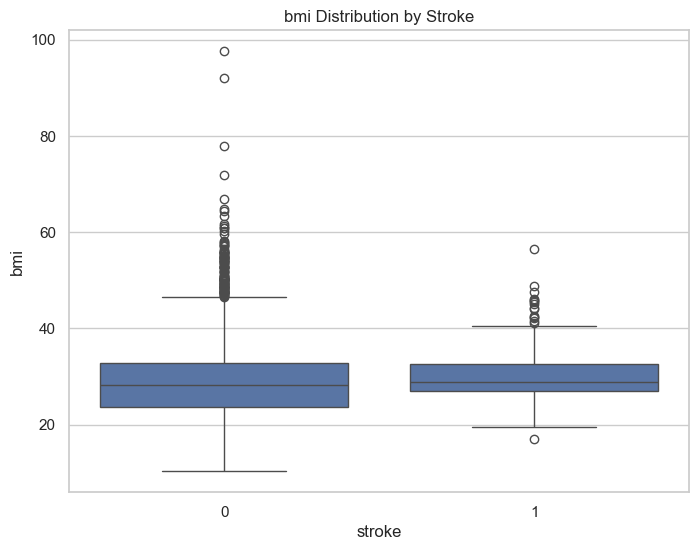

In [391]:
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting categorical columns
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='stroke', data=data)
    plt.title(f'Distribution of {col} by Stroke')
    plt.show()

# Plotting numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='stroke', y=col, data=data)
    plt.title(f'{col} Distribution by Stroke')
    plt.show()

Encoding

1- Gender Column

In [392]:
display(data['gender'].unique())
display(data[data['gender'] == 'Other'].shape)

array(['Male', 'Female', 'Other'], dtype=object)

(1, 11)

Drop row with gender  = 'Other' (Because it's only one row)

In [393]:
data = data[data['gender'] != 'Other']
display(data['gender'].unique())

array(['Male', 'Female'], dtype=object)

In [394]:
data['gender'] = (data['gender'] == 'Male').astype(int)
display(data['gender'].unique())
display(data.head(5))

array([1, 0])

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,1,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
51676,0,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
31112,1,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
60182,0,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
1665,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


2- ever_married Column

In [395]:
display(data['ever_married'].unique())

array(['Yes', 'No'], dtype=object)

In [396]:
data['ever_married'] = (data['ever_married'] == 'Yes').astype(int)
display(data['ever_married'].unique())
display(data.head(5))

array([1, 0])

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,1,67.0,0,1,1,Private,Urban,228.69,36.600000,formerly smoked,1
51676,0,61.0,0,0,1,Self-employed,Rural,202.21,28.893237,never smoked,1
31112,1,80.0,0,1,1,Private,Rural,105.92,32.500000,never smoked,1
60182,0,49.0,0,0,1,Private,Urban,171.23,34.400000,smokes,1
1665,0,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,never smoked,1


3- work_type column

In [397]:
display(data['work_type'].unique())

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [398]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data['work_type'] = label_encoder.fit_transform(data['work_type']).astype(int)
display(data['work_type'].unique())
data.head()

array([2, 3, 0, 4, 1])

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,1,67.0,0,1,1,2,Urban,228.69,36.600000,formerly smoked,1
51676,0,61.0,0,0,1,3,Rural,202.21,28.893237,never smoked,1
31112,1,80.0,0,1,1,2,Rural,105.92,32.500000,never smoked,1
60182,0,49.0,0,0,1,2,Urban,171.23,34.400000,smokes,1
1665,0,79.0,1,0,1,3,Rural,174.12,24.000000,never smoked,1


4- Residence_type column

In [399]:
display(data['Residence_type'].unique())

array(['Urban', 'Rural'], dtype=object)

In [400]:
data['Residence_type'] = (data['Residence_type'] == 'Urban').astype(int)
display(data['Residence_type'].unique())
display(data.head(5))

array([1, 0])

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,1,67.0,0,1,1,2,1,228.69,36.600000,formerly smoked,1
51676,0,61.0,0,0,1,3,0,202.21,28.893237,never smoked,1
31112,1,80.0,0,1,1,2,0,105.92,32.500000,never smoked,1
60182,0,49.0,0,0,1,2,1,171.23,34.400000,smokes,1
1665,0,79.0,1,0,1,3,0,174.12,24.000000,never smoked,1


5- smoking_status column

In [401]:
display(data['smoking_status'].unique())
display(data[data['smoking_status'] == 'Unknown'].shape)

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

(1544, 11)

In [402]:
smoking_order = ['never smoked', 'formerly smoked', 'smokes', 'Unknown']
data['smoking_status'] = data['smoking_status'].apply(lambda x: smoking_order.index(x))
display(data['smoking_status'].unique())
display(data.head(5))

array([1, 0, 2, 3], dtype=int64)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
51676,0,61.0,0,0,1,3,0,202.21,28.893237,0,1
31112,1,80.0,0,1,1,2,0,105.92,32.500000,0,1
60182,0,49.0,0,0,1,2,1,171.23,34.400000,2,1
1665,0,79.0,1,0,1,3,0,174.12,24.000000,0,1


Encoding Finished

In [403]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int32  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int32  
 5   work_type          5109 non-null   int32  
 6   Residence_type     5109 non-null   int32  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   int64  
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int32(4), int64(4)
memory usage: 399.1 KB


Normalization

In [404]:
# Function for Z-Score Normalization
def z_score_normalize(column):
    return (column - column.mean()) / column.std()

# Apply normalization to each column in the DataFrame
for col in data.columns:
    if(col in ["bmi", "avg_glucose_level", "age"]):
        data[col] = z_score_normalize(data[col])

# Display the normalized DataFrame
print(data)


       gender       age  hypertension  heart_disease  ever_married  work_type  \
id                                                                              
9046        1  1.051139             0              1             1          2   
51676       0  0.785812             0              0             1          3   
31112       1  1.626015             0              1             1          2   
60182       0  0.255157             0              0             1          2   
1665        0  1.581794             1              0             1          3   
...       ...       ...           ...            ...           ...        ...   
18234       0  1.626015             1              0             1          2   
44873       0  1.670236             0              0             1          3   
19723       0 -0.363940             0              0             1          3   
37544       1  0.343600             0              0             1          2   
44679       0  0.034051     

Outliers

In [405]:
for col in data.columns:
     if(col in ["bmi", "avg_glucose_level", "age"]):
        out = data[abs(data[col]) > 3]
        print(col, "Outliers:", out.shape)

age Outliers: (0, 11)
avg_glucose_level Outliers: (49, 11)
bmi Outliers: (59, 11)


Replace Outliers

In [406]:
#get min & max in avg_glucose_level column
gluc_min = data['avg_glucose_level'].quantile(0.25)
gluc_max = data['avg_glucose_level'].quantile(0.75)

# Replace values in avg_glucose_level column where value > 3 with the min/max
data['avg_glucose_level'] = data['avg_glucose_level'].apply(lambda x: gluc_max if x > 3 else (gluc_min if x < -3 else x))

# Calculate the median of the BMI column
bmi_median = data['bmi'].median()

# Replace values in BMI column where abs(value) > 3 with the median
data['bmi'] = data['bmi'].apply(lambda x: bmi_median if abs(x) > 3 else x)

for col in data.columns:
     if(col in ["bmi", "avg_glucose_level", "age"]):
        out = data[abs(data[col]) > 3]
        print(col, "Outliers:", out.shape)

age Outliers: (0, 11)
avg_glucose_level Outliers: (0, 11)
bmi Outliers: (0, 11)


Check the stroke column

In [407]:
display(data['stroke'].unique())

array([1, 0], dtype=int64)

Heatmap visulaization

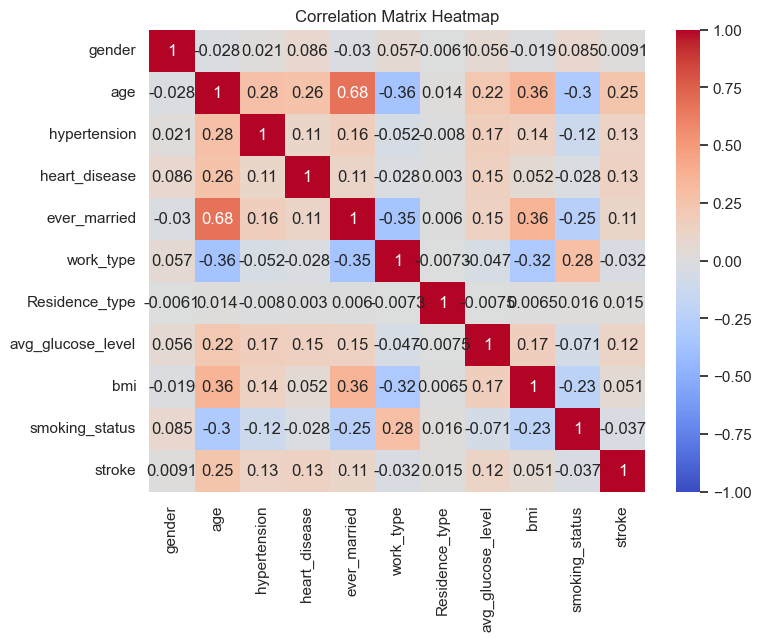

In [408]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# Set the title of the heatmap
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

dropping low-correlation columns (cr < 0.04)

In [409]:
# List of columns to drop
columns_to_drop = ['gender', 'work_type', 'Residence_type', 'smoking_status', 'bmi']

# Drop the specified columns
data_dropped = data.drop(columns=columns_to_drop)
data_dropped.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,stroke
id,,,,,,
9046,1.051139,0,1,1,2.706185,1
51676,0.785812,0,0,1,2.121444,1
31112,1.626015,0,1,1,-0.004867,1
60182,0.255157,0,0,1,1.437332,1
1665,1.581794,1,0,1,1.501150,1


Check Imbalance

In [410]:
ones = data_dropped[data_dropped['stroke'] == 1].value_counts().sum()
zeros = data_dropped[data_dropped['stroke'] != 1].value_counts().sum()
print("Ones:", ones)
print("Zeros:", zeros)

Ones: 249
Zeros: 4860


Oversampling SMOTE

In [411]:
from imblearn.over_sampling import SMOTE

#split data into x, y (target)
X = data_dropped.iloc[:, :-1] #all columns except target
y = data_dropped.iloc[:, -1]  #target -> stroke column 
X, y = SMOTE(random_state=42).fit_resample(X, y)

Splitting Data (20% Test, 80% Train)

In [412]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

LogisticRegression Algo

In [413]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7680041152263375
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       972
           1       0.75      0.80      0.78       972

    accuracy                           0.77      1944
   macro avg       0.77      0.77      0.77      1944
weighted avg       0.77      0.77      0.77      1944

[[714 258]
 [193 779]]


C:\Users\moham\AppData\Local\Temp\ipykernel_11360\2488861408.py:7: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


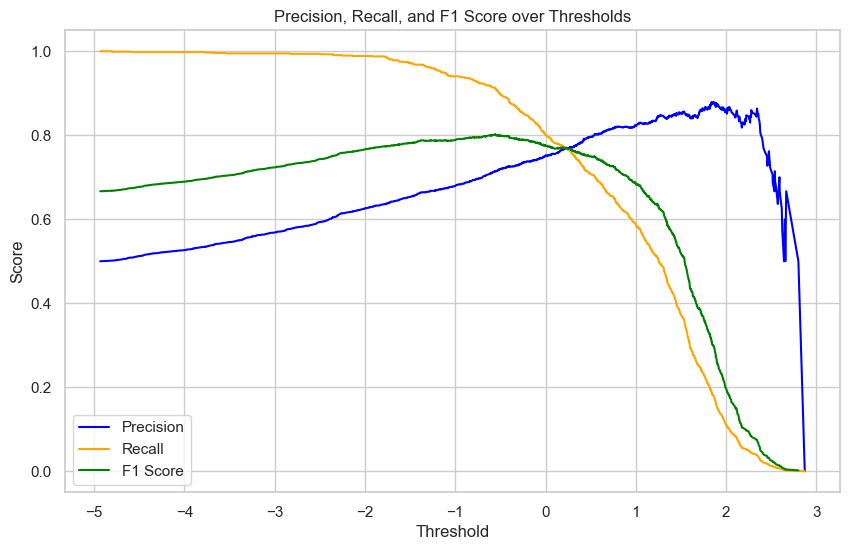

In [414]:
from sklearn.metrics import precision_recall_curve

# Compute precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, model.decision_function(X_test))

# Calculate F1 Score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Plot Precision and Recall over different thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='orange')
plt.plot(thresholds, f1_scores[:-1], label='F1 Score', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score over Thresholds')
plt.legend(loc='best')
plt.grid(True)
plt.show()


SVM Algo

In [415]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# # Standardize features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Initialize the SVM model
model = SVC(kernel='linear')  # You can choose different kernels like 'rbf' or 'poly'

# Train the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7695473251028807
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       972
           1       0.75      0.81      0.78       972

    accuracy                           0.77      1944
   macro avg       0.77      0.77      0.77      1944
weighted avg       0.77      0.77      0.77      1944

[[705 267]
 [181 791]]


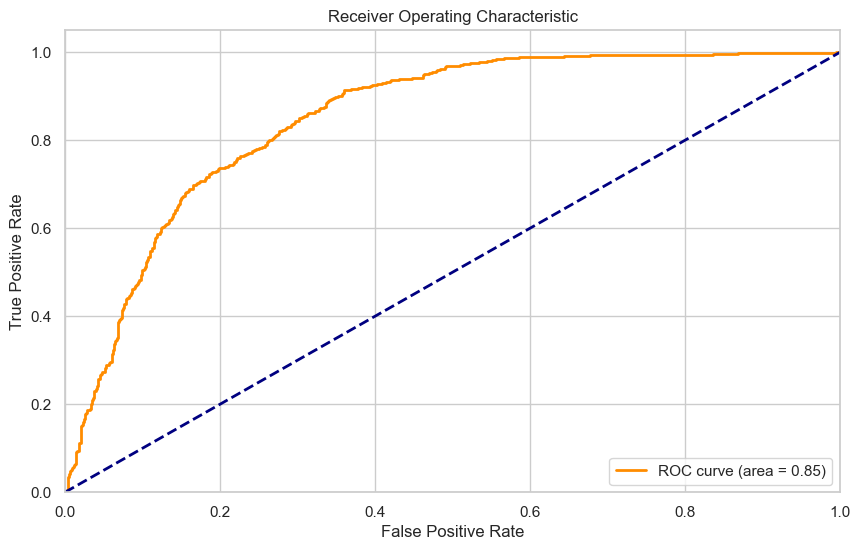

In [416]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()


# You need to obtain y_scores from model.predict_proba or decision_function
y_scores = model.decision_function(X_test)  # For SVM with decision function
plot_roc_curve(y_test, y_scores)


KNN Algo

In [417]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # Adjust the value of K as needed

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8518518518518519
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       972
           1       0.83      0.89      0.86       972

    accuracy                           0.85      1944
   macro avg       0.85      0.85      0.85      1944
weighted avg       0.85      0.85      0.85      1944

[[791 181]
 [107 865]]


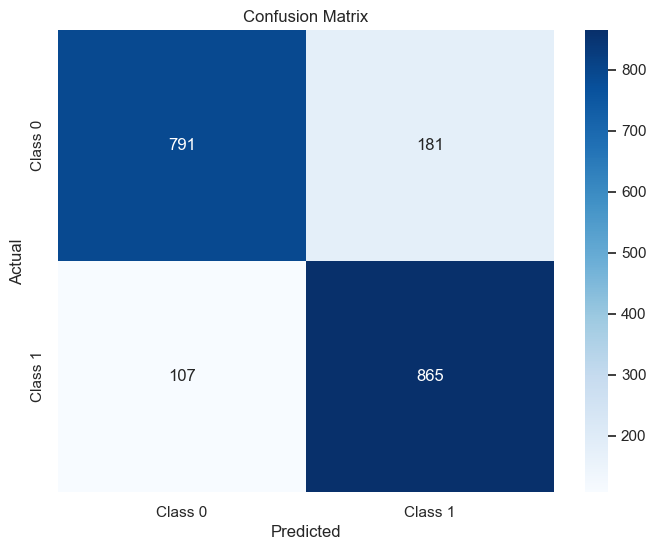

In [418]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

classes = ['Class 0', 'Class 1']
plot_confusion_matrix(y_test, y_pred, classes)


RandomForest Algo

In [419]:
from sklearn.ensemble import RandomForestClassifier


# Create Random Forest classifier
rf = RandomForestClassifier(n_estimators=90, random_state=55)  # Adjust the number of trees as needed

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8945473251028807
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       972
           1       0.89      0.90      0.90       972

    accuracy                           0.89      1944
   macro avg       0.89      0.89      0.89      1944
weighted avg       0.89      0.89      0.89      1944

[[860 112]
 [ 93 879]]


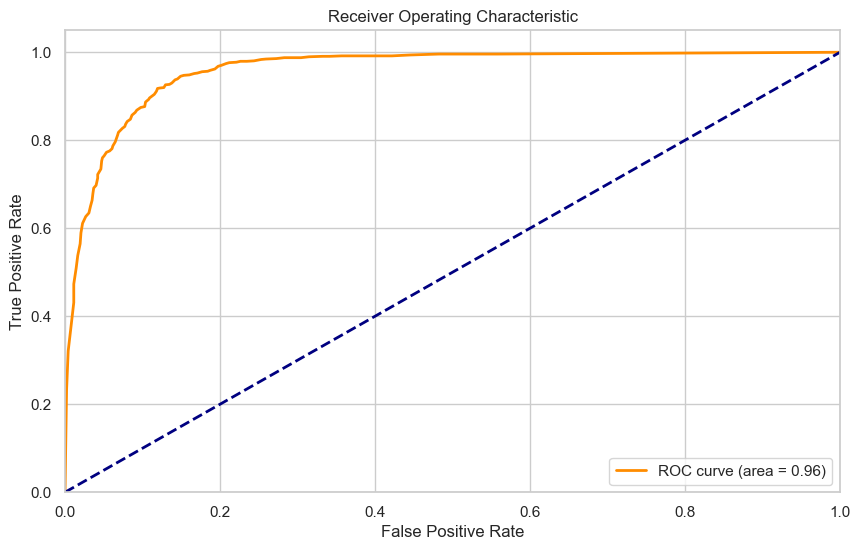

In [420]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()


# You need to obtain y_scores from model.predict_proba or decision_function
y_scores = rf.predict_proba(X_test) [:, 1] # For SVM with decision function
plot_roc_curve(y_test, y_scores)


DecisionTree Algo

In [421]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=100)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.904320987654321
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       972
           1       0.91      0.90      0.90       972

    accuracy                           0.90      1944
   macro avg       0.90      0.90      0.90      1944
weighted avg       0.90      0.90      0.90      1944

[[886  86]
 [100 872]]


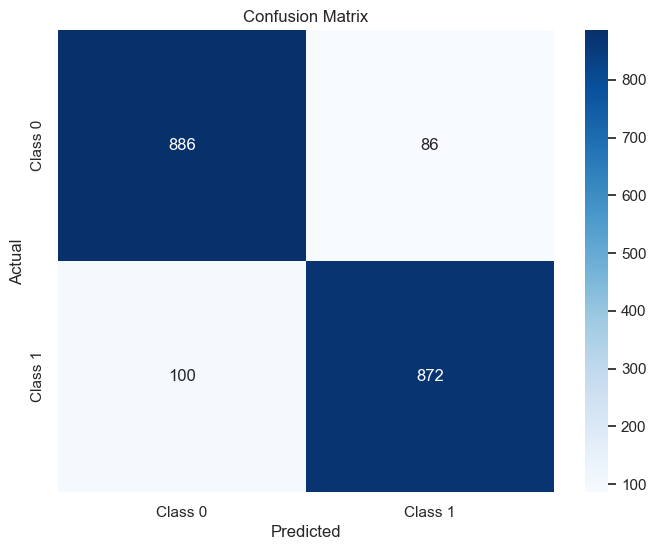

In [422]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()


classes = ['Class 0', 'Class 1']
plot_confusion_matrix(y_test, y_pred, classes)


Feature importance Percentages

In [423]:
# Get feature importance
feature_importance = model.feature_importances_

# Create a DataFrame with feature names and importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the DataFrame
print(feature_importance_df)

             Feature  Importance
0                age    0.694389
4  avg_glucose_level    0.250531
1       hypertension    0.024430
2      heart_disease    0.018410
3       ever_married    0.012241
